In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# subplot library
from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "openpyxl")

# Exercise 1

In [2]:
# Data citation: Akbilgic, Oguz. (2013). ISTANBUL STOCK EXCHANGE. UCI Machine Learning Repository.
# data source website: https://archive-beta.ics.uci.edu/ml/datasets/istanbul+stock+exchange
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx"
data = pd.read_excel(url, index_col = 0, skiprows = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 536 entries, 2009-01-05 to 2011-02-22
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ISE      536 non-null    float64
 1   ISE.1    536 non-null    float64
 2   SP       536 non-null    float64
 3   DAX      536 non-null    float64
 4   FTSE     536 non-null    float64
 5   NIKKEI   536 non-null    float64
 6   BOVESPA  536 non-null    float64
 7   EU       536 non-null    float64
 8   EM       536 non-null    float64
dtypes: float64(9)
memory usage: 41.9 KB


In [3]:
# Data showing returns from various European stock indices
data.head()

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


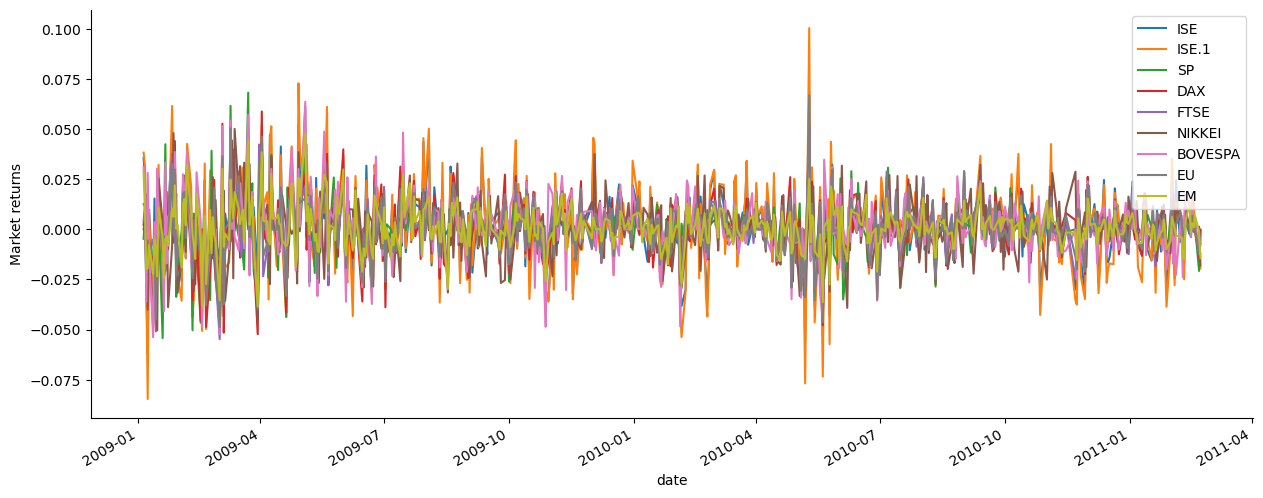

In [4]:
# Returns over time
data.plot(figsize = (15,6), ylabel = "Market returns")
plt.savefig('Figure_15_03a.png',dpi=300)
sns.despine()
plt.show()

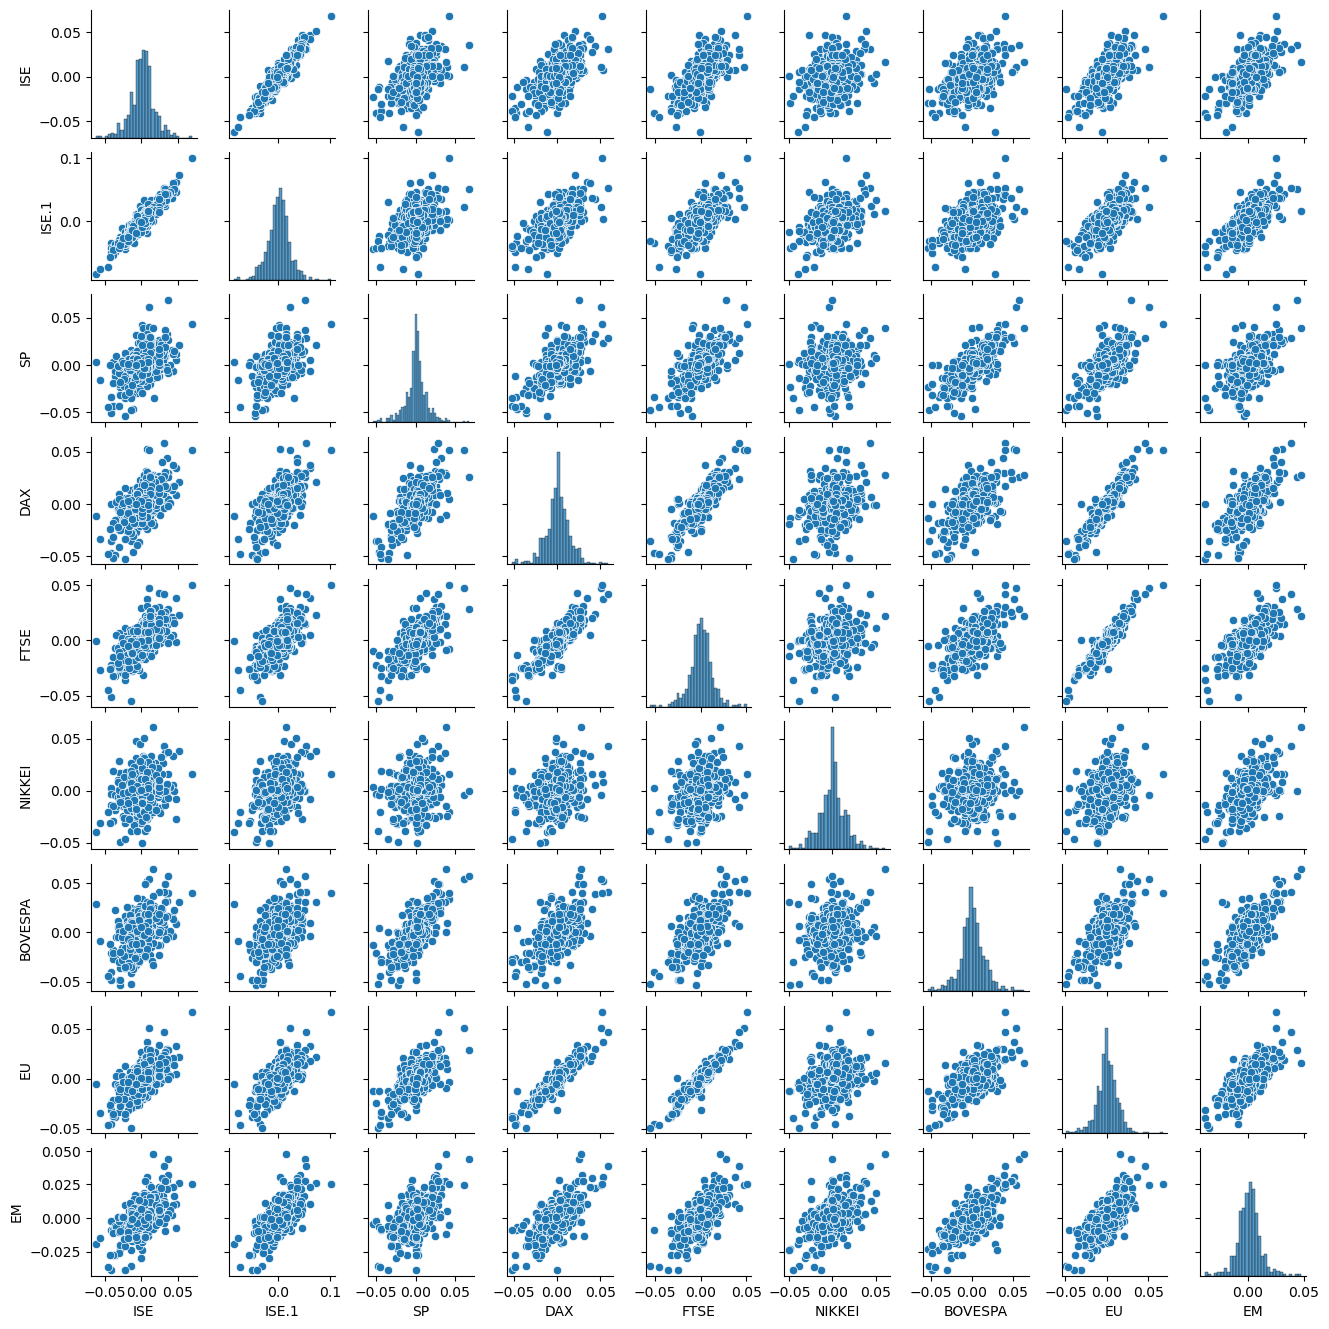

In [5]:
# Bivariate scatterplots for all variables
sns.pairplot(data, height = 1.5)
plt.show()

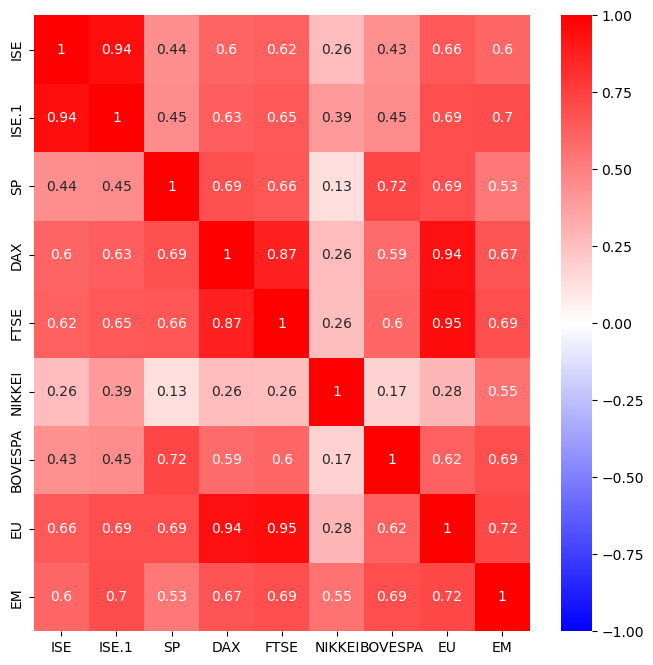

In [6]:
# Pairwise correlations shown in a heatmap instead
plt.figure(figsize = (8,8))
heatmap = sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, cmap = "bwr")
plt.savefig('Figure_15_03b.png',dpi=300)
plt.show()

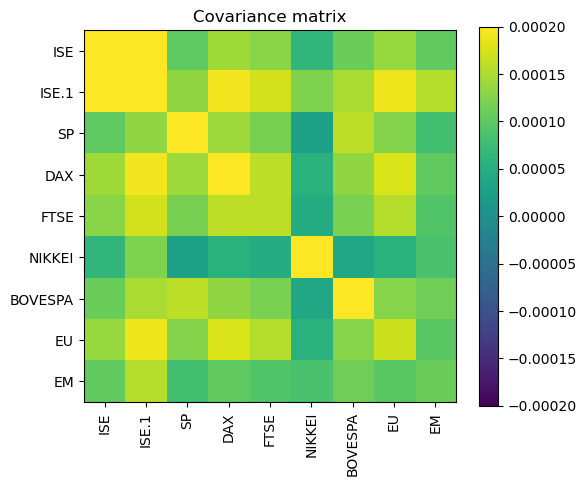

In [7]:
# Generate covariance matrix
X = data.values
X = X - np.mean(X, axis = 0, keepdims = True)
X = X.T @ X / (X.shape[0] - 1)

plt.figure(figsize = (6,6))
plt.imshow(X, vmin = -0.0002, vmax = 0.0002)
plt.colorbar(shrink = 0.82)
plt.title("Covariance matrix")
plt.xticks(range(X.shape[1]), labels = data.columns, rotation = 90)
plt.yticks(range(X.shape[1]), labels = data.columns)
plt.savefig('Figure_15_03c.png',dpi=300)
plt.show()

In [8]:
# Eigendecomposition reordered by weight
evals, evecs = np.linalg.eig(X)
sidx = np.argsort(evals)[::-1]
evals = evals[sidx]
evecs = evecs[:,sidx]

# Component, factor scores
components = data.values @ evecs[:,0:2]
print(components.shape)
factor_scores = 100 * evals / np.sum(evals)
print(factor_scores)

(536, 2)
[64.10140478 14.08853005  9.61237955  6.03925492  2.97963327  1.1958931
  1.10384893  0.63257407  0.24648133]


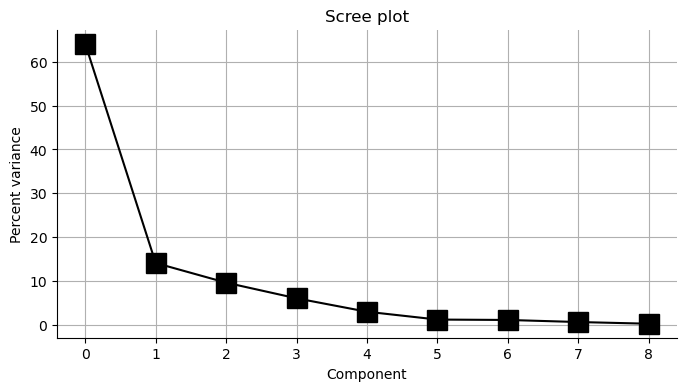

In [9]:
# Scree plot
plt.figure(figsize = (8,4))
plt.plot(factor_scores, "ks-", markersize = 15)
plt.xlabel("Component")
plt.ylabel("Percent variance")
plt.title("Scree plot")
sns.despine()
plt.grid()
plt.show()

In [10]:
# Variance of the components equals the eigenvalues
print("Variance of first two components: ")
print(np.var(components, axis = 0, ddof = 1))
print("First two eigenvalues: ")
print(evals[:2])

Variance of first two components: 
[0.0013006  0.00028585]
First two eigenvalues: 
[0.0013006  0.00028585]


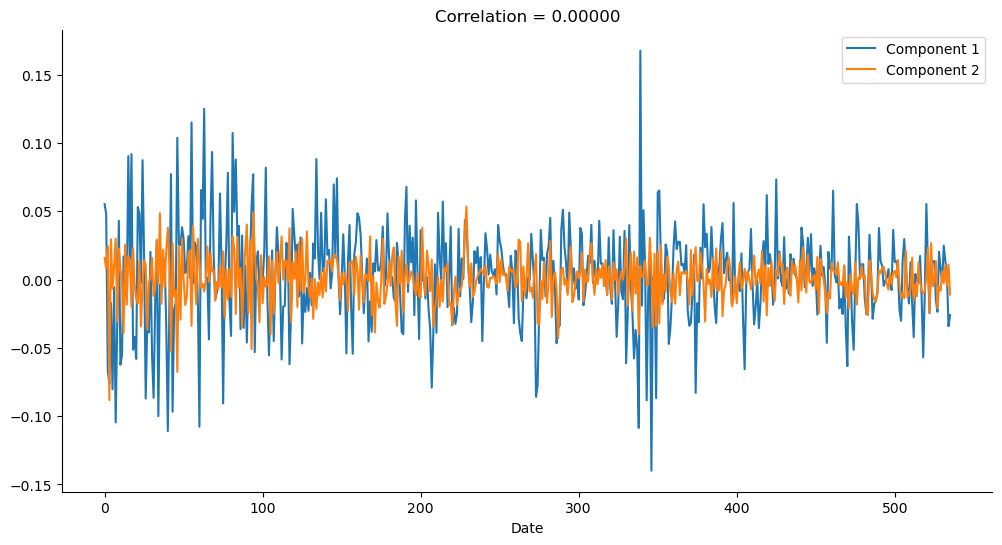

In [11]:
# Correlation of the first two components (should be zero)
plt.figure(figsize = (12,6))
plt.plot(components)
plt.xlabel("Date")
plt.legend(["Component 1", "Component 2"])
plt.title(f"Correlation = {np.corrcoef(components.T)[0,1]:.5f}")
sns.despine()
plt.show()

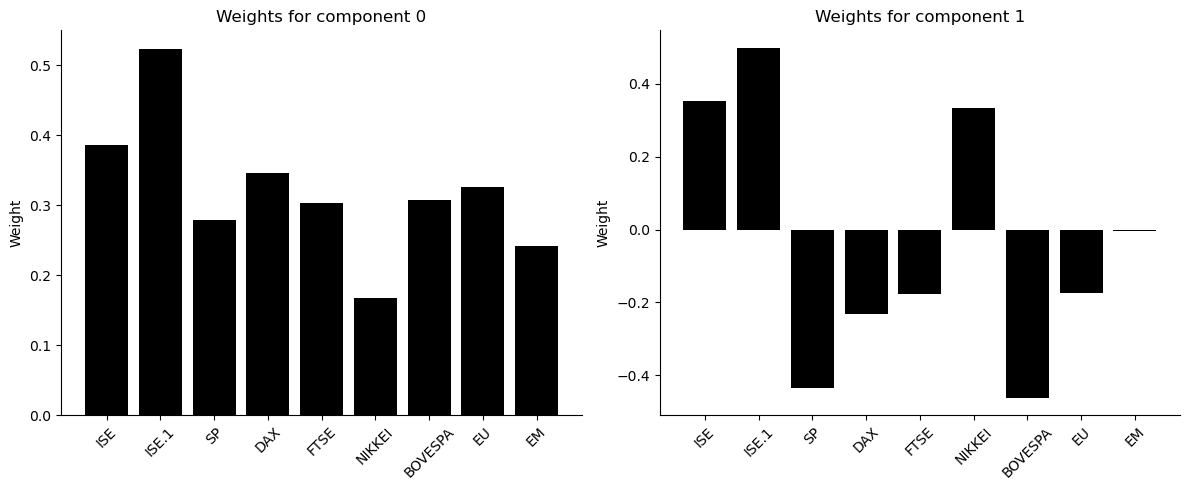

In [12]:
# Plot of component weights
fig, ax = plt.subplots(1, 2, figsize = (12,5))

for i in range(2):
    ax[i].bar(range(X.shape[1]), evecs[:,i], color = "black")
    ax[i].set_xticks(range(X.shape[1]))
    ax[i].set_xticklabels(data.columns, rotation = 45)
    ax[i].set_ylabel("Weight")
    ax[i].set_title(f"Weights for component {i}")
    
plt.tight_layout()
sns.despine()
plt.show()

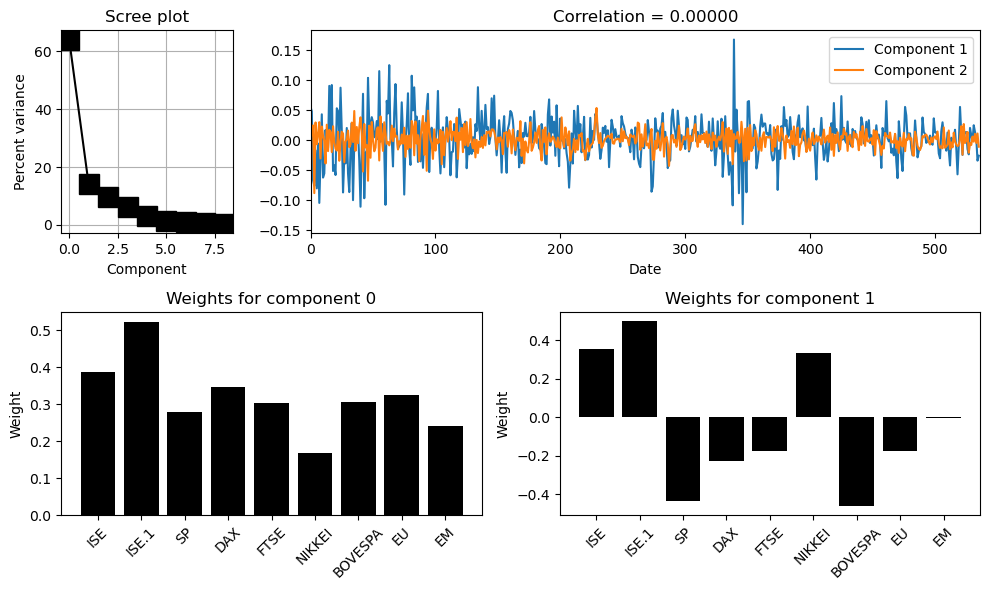

In [13]:
# Combined plots
fig = plt.figure(figsize = (10,6))
gs = GridSpec(2, 4, figure = fig)

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(factor_scores, "ks-", markersize = 15)
ax1.set_xlabel("Component")
ax1.set_ylabel("Percent variance")
ax1.set_title("Scree plot")
ax1.grid()

ax2 = fig.add_subplot(gs[0,1:])
ax2.plot(components)
ax2.set_xlabel("Date")
ax2.set_xlim([0, components.shape[0]])
ax2.legend(["Component 1", "Component 2"])
ax2.set_title(f"Correlation = {np.corrcoef(components.T)[0,1]:.5f}")

ax3 = fig.add_subplot(gs[1,:2]), fig.add_subplot(gs[1,2:])
for i in range(2):
    ax3[i].bar(range(X.shape[1]), evecs[:,i], color = "black")
    ax3[i].set_xticks(range(X.shape[1]))
    ax3[i].set_xticklabels(data.columns, rotation = 45)
    ax3[i].set_ylabel("Weight")
    ax3[i].set_title(f"Weights for component {i}")
    
plt.tight_layout()
plt.savefig('Figure_15_04.png',dpi=300)
plt.show()

# Exercise 2

In [14]:
# PCA from SVD on covariance matrix
U, s, Vt = np.linalg.svd(X)
print("First 4 eigen/singular values:")
print(evals[:4])
print(s[:4])
print("First eigen/singular vectors: ")
print(evecs[:,0])
print(U[:,0])

First 4 eigen/singular values:
[0.0013006  0.00028585 0.00019503 0.00012253]
[0.0013006  0.00028585 0.00019503 0.00012253]
First eigen/singular vectors: 
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]
[-0.3864847  -0.52390953 -0.27860507 -0.34621538 -0.30322542 -0.16781756
 -0.30741897 -0.32544121 -0.24111348]


In [15]:
# PCA from SVD on data matrix
X = data.values
X = X - np.mean(X, axis = 0, keepdims = True)
U, s, Vt = np.linalg.svd(X)
print("First 4 eigen/singular values:")
print(evals[:4])
print(s[:4]**2 / (X.shape[0] - 1))
print("First eigen/singular vectors: ")
print(evecs[:,0])
print(Vt[:,0])

First 4 eigen/singular values:
[0.0013006  0.00028585 0.00019503 0.00012253]
[0.0013006  0.00028585 0.00019503 0.00012253]
First eigen/singular vectors: 
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]
[-0.3864847  -0.35298874  0.33940396 -0.14970844  0.06821543 -0.13073363
  0.39457344 -0.63777909 -0.06500667]


- Notice that like we might expect, eigendecomposition and SVD vectors can have flipped signs
- Need to square singular values and divide by (n-1) when decomposing the data matrix

# Exercise 3

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
X_t = pca.fit_transform(data)
print("Eigenvalues: ")
print(evals[:4])
print("Explained variance from sklearn: ")
print(pca.explained_variance_[:4])
print("First eigenvector: ")
print(evecs[:,0])
print("First sklearn component vector: ")
print(pca.components_[0,:])

Eigenvalues: 
[0.0013006  0.00028585 0.00019503 0.00012253]
Explained variance from sklearn: 
[0.0013006  0.00028585 0.00019503 0.00012253]
First eigenvector: 
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]
First sklearn component vector: 
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]


# Exercise 4

In [17]:
x = np.hstack((np.random.randn(1000,1),0.05*np.random.randn(1000,1)))
theta = -np.pi / 6
R1 = np.array([np.cos(theta), -np.sin(theta), np.sin(theta), np.cos(theta)]).reshape(2,2)
theta = -np.pi / 3
R2 = np.array([np.cos(theta), -np.sin(theta), np.sin(theta), np.cos(theta)]).reshape(2,2)

X = np.vstack((x @ R1, x @ R2))
X.shape

(2000, 2)

In [18]:
# PCA from SVD
U, s, Vt = np.linalg.svd(X - np.mean(X, axis = 0, keepdims = True))
s = s**2 / (X.shape[0] - 1)
Vt *= 2

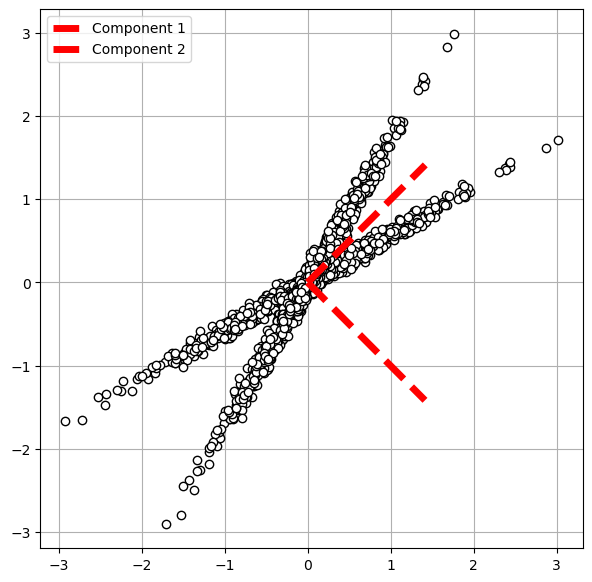

In [19]:
plt.figure(figsize = (7,7))
plt.plot(X[:,0], X[:,1], "ko", markerfacecolor = "w")
plt.plot([0, Vt[0,0]], [0, Vt[1,0]], "r--", linewidth = 5, label = "Component 1")
plt.plot([0, Vt[0,1]], [0, Vt[1,1]], "r--", linewidth = 5, label = "Component 2")
plt.legend()
plt.grid()
plt.savefig('Figure_15_05.png',dpi=300)
plt.show()

- In summary, we generated tuples with small y values relative to x
- We then rotated these values 30 and 60 degrees roughly
- Notice that PCA does not necessarily yield insight into this data because we know that the data lies mainly along two lines, but the first component compromises between the two lines and the second explains very little variation

# Exercise 5
- Generate data with one column added to the other to create correlation
- Shift one of the sets by [2,-1] to cause the group difference as seen in the graph

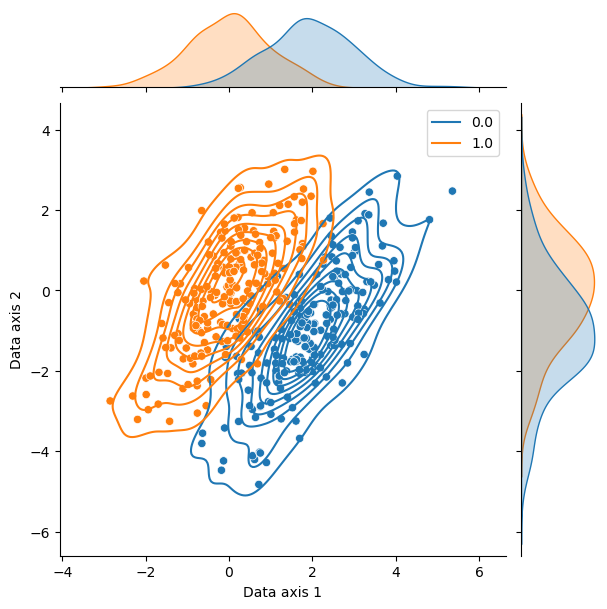

In [20]:
N = 200
class_1 = np.random.randn(N,2)
class_1[:,1] += class_1[:,0]
class_1 += np.array([2, -1])

class_2 = np.random.randn(N,2)
class_2[:,1] += class_2[:,0]

all_data = np.vstack((class_1,class_2))
labels = np.append(np.zeros(N), np.ones(N))

ax = sns.jointplot(x = all_data[:,0], y = all_data[:,1], hue = labels)
ax.ax_joint.set_xlabel("Data axis 1")
ax.ax_joint.set_ylabel("Data axis 2")
ax.plot_joint(sns.kdeplot)
plt.savefig('Figure_15_02a.png',dpi=300)
plt.show()

# Exercise 6
- For PCA, we wanted to find weights that maximize the variance of the matrix relative to the weights (effectively constraining weight norms to 1)
- Notice that we can compute within-class covariance by computing the covariances separately for each label and then averaging the results
- Furthermore, we can compute the between-class covariances by averaging the observations for each label and then computing the covariance matrix for the resulting mean matrix
- LDA works by finding a transformation that will have a large impact on between-class covariance relative to its impact on within-class covariance
- To find this, take the generalized eigendecomposition of the two matrices (similar derivation to the PCA)

In [21]:
# Between-class covariance
cmc1 = np.mean(class_1, axis = 0)
cmc2 = np.mean(class_2, axis = 0)
cov_B = np.cov(np.vstack((cmc1,cmc2)).T, ddof = 1)

# Within-class covariance
cov1 = np.cov(class_2.T, ddof = 1)
cov2 = np.cov(class_2.T, ddof = 1)
cov_W = (cov1 + cov2) / 2

from scipy.linalg import eigh
evals,evecs = eigh(cov_B, cov_W)
sidx = np.argsort(evals)[::-1]
evals = evals[sidx]
evecs = evecs[:,sidx]

# Project data onto the eigenvector axes
proj_A = (all_data - np.mean(all_data, axis = 0)) @ evecs

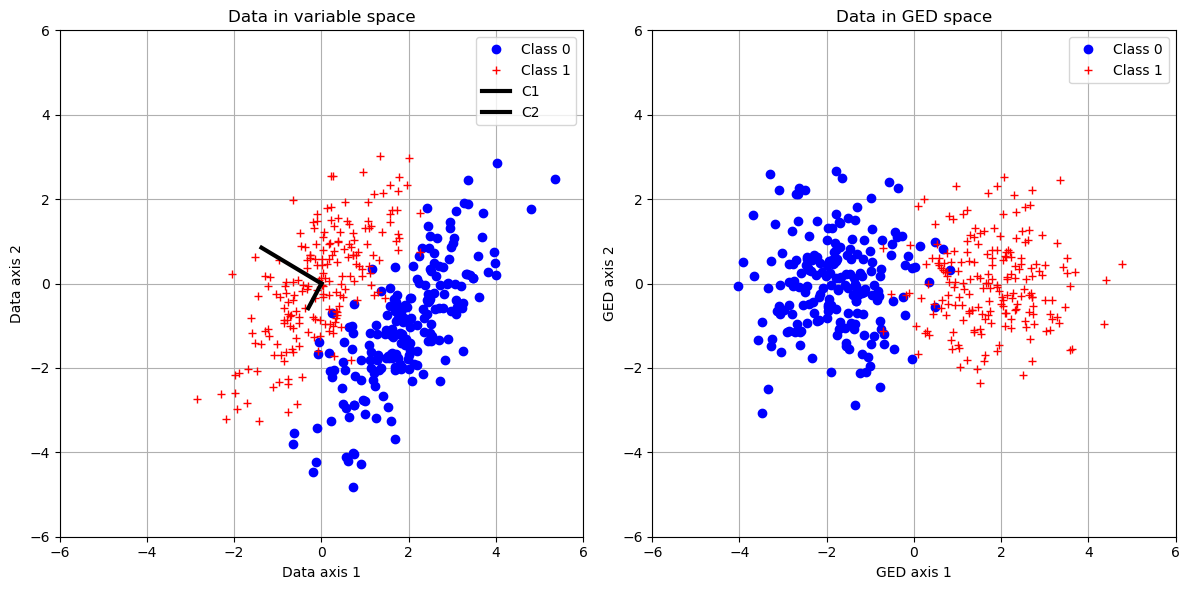

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))
marker = ["bo", "r+"]
for i in range(2):
    ax[0].plot(all_data[labels == i,0], all_data[labels == i,1], marker[i], label = f"Class {i}")
ax[0].plot([0, evecs[0,0]], [0, evecs[1,0]], "k-", linewidth = 3, label = "C1")
ax[0].plot([0, evecs[0,1]], [0, evecs[1,1]], "k-", linewidth = 3, label = "C2")
ax[0].set_xlabel("Data axis 1")
ax[0].set_ylabel("Data axis 2")
ax[0].set_title("Data in variable space")
    
for i in range(2):
    ax[1].plot(proj_A[labels == i, 0], proj_A[labels == i, 1], marker[i], label = f"Class {i}")
ax[1].set_xlabel("GED axis 1")
ax[1].set_ylabel("GED axis 2")
ax[1].set_title("Data in GED space")

for i in range(2):
    ax[i].axis([-6,6,-6,6])
    ax[i].grid()
    ax[i].legend()

plt.tight_layout()
plt.savefig('Figure_15_06ab.png',dpi=300)
plt.show()

In [23]:
predicted_label = (proj_A[:,0] > 0)
print(f"Prediction accuracy: {100 * np.mean(predicted_label == labels)}%")

Prediction accuracy: 96.75%


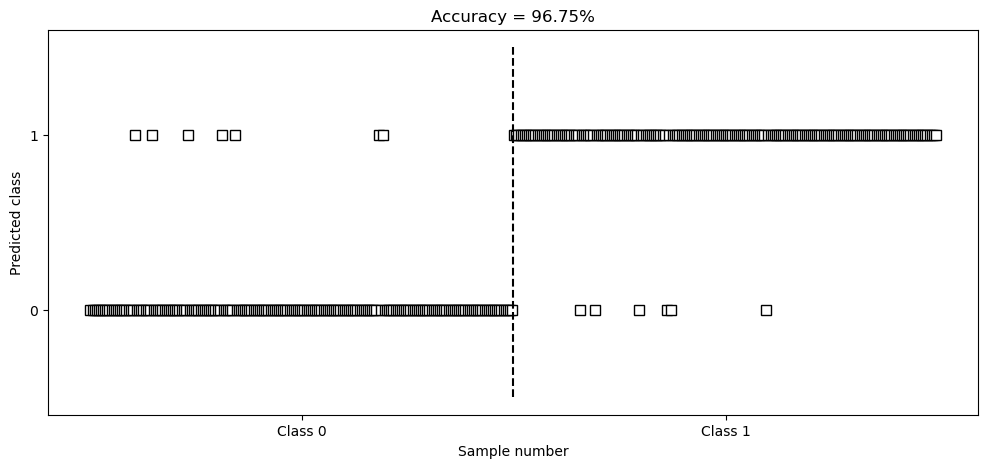

In [24]:
plt.figure(figsize = (12,5))
plt.plot(predicted_label, "ks", markersize = 7, markerfacecolor = "w", linewidth = 2)
plt.plot([N - 0.5, N - 0.5], [-0.5, 1.5], "k--")
plt.xlabel("Sample number")
plt.ylabel("Predicted class")
plt.xticks([100,300], labels = ["Class 0", "Class 1"])
plt.yticks([0,1])
plt.title(f"Accuracy = {100 * np.mean(predicted_label == labels)}%")
plt.savefig('Figure_15_06c.png',dpi=300)
plt.show()

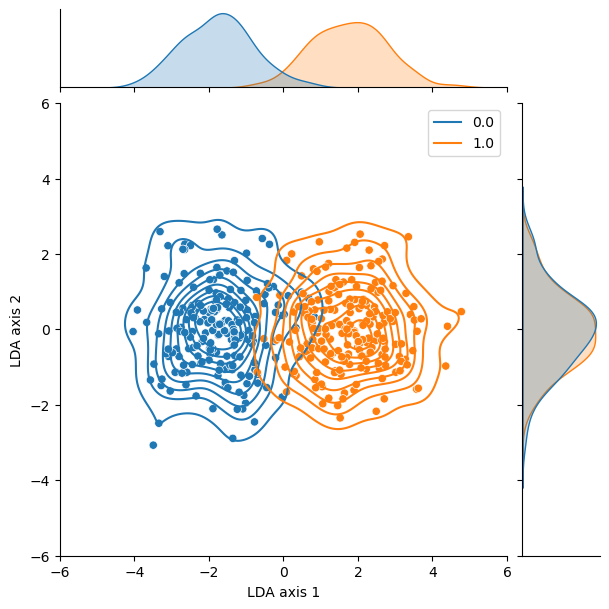

In [25]:
ax = sns.jointplot(x = proj_A[:,0], y = proj_A[:,1], hue = labels, xlim = [-6,6], ylim = [-6,6])
ax.ax_joint.set_xlabel("LDA axis 1")
ax.ax_joint.set_ylabel("LDA axis 2")
ax.plot_joint(sns.kdeplot)
sns.despine()
plt.savefig('Figure_15_02b.png',dpi=300)
plt.show()

# Exercise 7
- For generalized eigendecomposition, the eigenvector matrix is not orthogonal
- However, the eigenvectors are orthogonal in the space of the denominator/within matrix

In [26]:
print("V'V: ")
print(np.round(evecs.T @ evecs, 3))
print("V'RV: ")
print(np.round(evecs.T @ cov_W @ evecs, 3))

V'V: 
[[ 2.609 -0.082]
 [-0.082  0.432]]
V'RV: 
[[1. 0.]
 [0. 1.]]


# Exercise 8

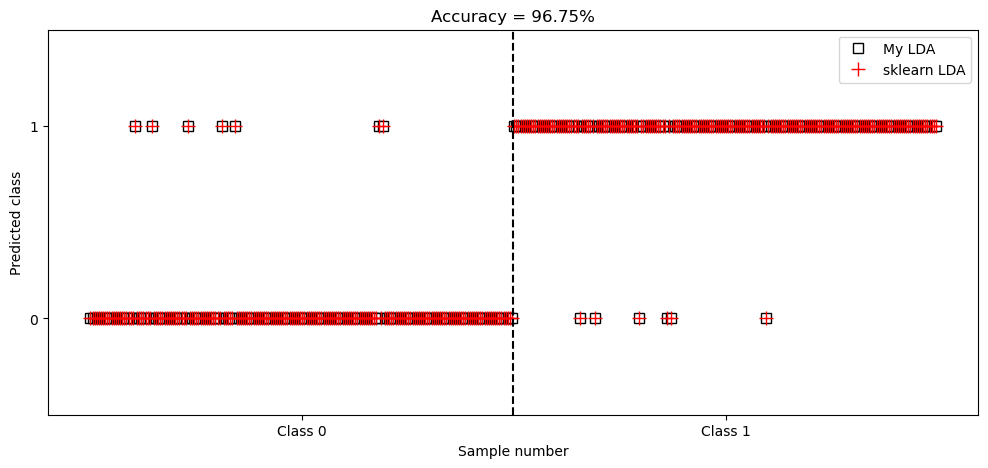

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ldamodel = LDA(solver = "eigen")
ldamodel.fit(all_data, labels)

plt.figure(figsize = (12,5))
plt.plot(predicted_label, "ks", markersize = 7, markerfacecolor = "w",
        linewidth = 2, label = "My LDA")
plt.plot(ldamodel.predict(all_data), "r+", markersize = 10, markerfacecolor = "w",
        linewidth = 2, label = "sklearn LDA")
plt.plot([N - 0.5, N - 0.5], [-0.5, 1.5], "k--")
plt.xlabel("Sample number")
plt.ylabel("Predicted class")
plt.xticks([100,300], labels = ["Class 0", "Class 1"])
plt.yticks([0,1])
plt.ylim([-0.5,1.5])
plt.legend()
plt.title(f'Accuracy = {100 * np.mean(ldamodel.predict(all_data) == labels):.2f}%')
plt.savefig('Figure_15_07.png',dpi=300)
plt.show()

# Exercise 9

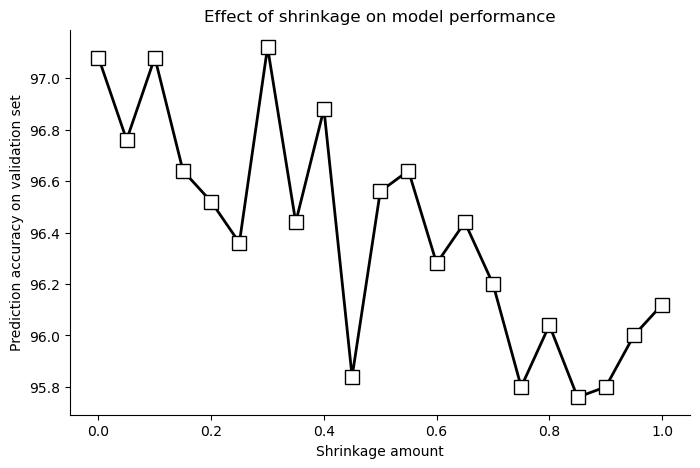

In [28]:
shrinkage = np.linspace(0, 1, 21)
accuracies = np.zeros(len(shrinkage))

for i, s in enumerate(shrinkage):
    ldamodel = LDA(solver = "eigen", shrinkage = s)
    tmpacc = []
    for _ in range(50):
        randorder = np.random.permutation(all_data.shape[0])
        ldamodel.fit(all_data[randorder[:350],:], labels[randorder[:350]])
        tmpacc.append(100 * np.mean(ldamodel.predict(all_data[randorder[350:],:]) == labels[randorder[350:]]))
    accuracies[i] = np.mean(tmpacc)
    
plt.figure(figsize = (8,5))
plt.plot(shrinkage, accuracies, "ks-", markersize = 10, markerfacecolor = "w", linewidth = 2)
plt.xlabel("Shrinkage amount")
plt.ylabel("Prediction accuracy on validation set")
plt.title("Effect of shrinkage on model performance")
sns.despine()
plt.savefig('Figure_15_08.png',dpi=300)
plt.show()

# Exercise 10

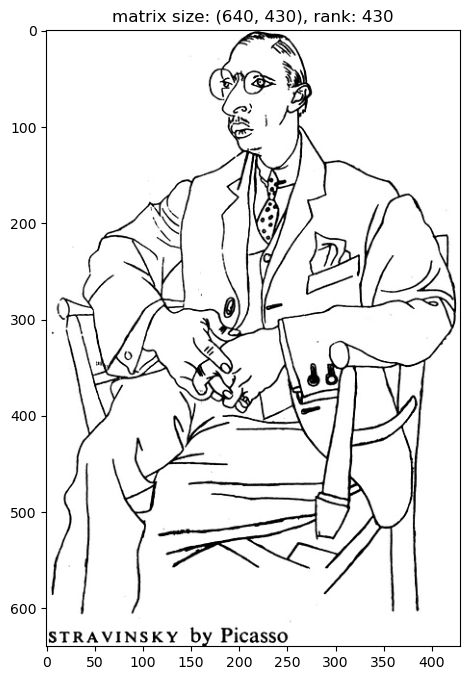

In [29]:
from skimage import io,color
url = "https://berggasse19.org/wp-content/uploads/2015/05/stravinsky_picasso_wikipedia.png"

strav = io.imread(url) / 255
plt.figure(figsize = (8,8))
plt.imshow(strav, cmap = "gray")
plt.title(f"matrix size: {strav.shape}, rank: {np.linalg.matrix_rank(strav)}")
plt.show()

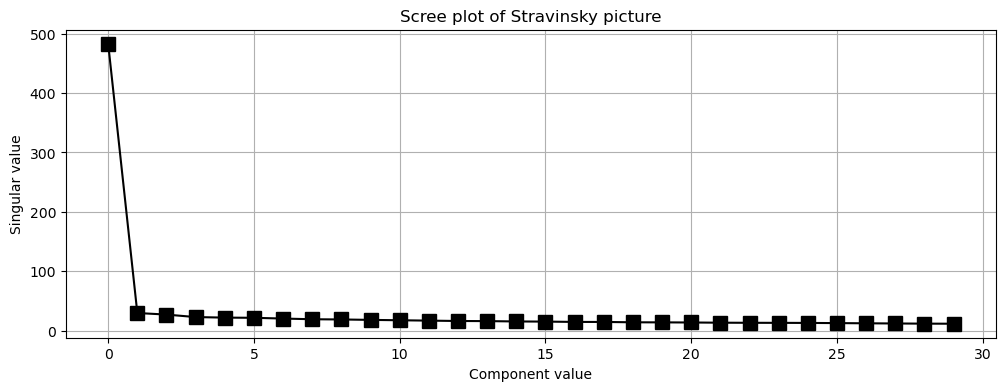

In [30]:
U, s, Vt = np.linalg.svd(strav)
S = np.zeros_like(strav)
np.fill_diagonal(S,s)

plt.figure(figsize = (12,4))
plt.plot(s[:30], "ks-", markersize = 10)
plt.xlabel("Component value")
plt.ylabel("Singular value")
plt.title("Scree plot of Stravinsky picture")
plt.grid()
plt.show()

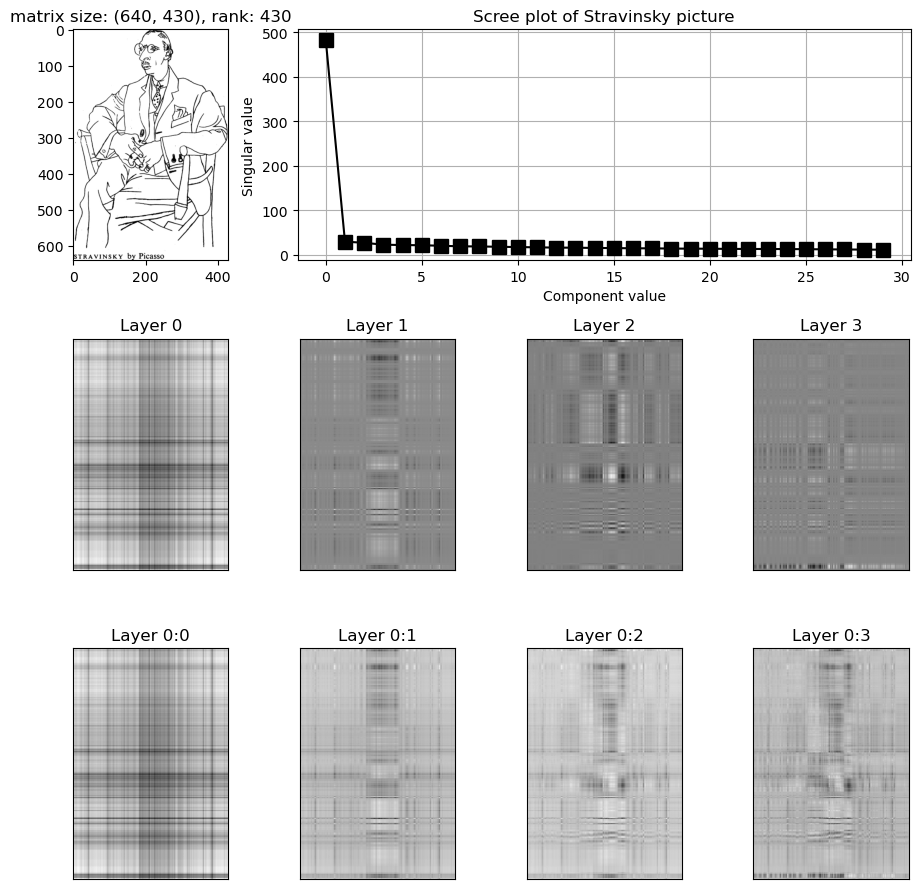

In [31]:
fig = plt.figure(figsize = (9,9))
gs = GridSpec(3, 4, figure = fig)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(strav, cmap = "gray")
ax1.set_title(f"matrix size: {strav.shape}, rank: {np.linalg.matrix_rank(strav)}")

ax2 = fig.add_subplot(gs[0,1:])
ax2.plot(s[:30], "ks-", markersize = 10)
ax2.set_xlabel("Component value")
ax2.set_ylabel("Singular value")
ax2.set_title("Scree plot of Stravinsky picture")
ax2.grid()

layers = 4
rank1mats = np.zeros((layers, strav.shape[0], strav.shape[1]))

for i in range(layers):
    rank1mats[i,:,:] = np.outer(U[:,i], Vt[i,:]) * s[i]
    ax = fig.add_subplot(gs[1,i])
    ax.imshow(rank1mats[i,:,:], cmap = "gray")
    ax.set_title(f"Layer {i}")
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = fig.add_subplot(gs[2,i])
    ax.imshow(np.sum(rank1mats[:i+1,:,:], axis = 0), cmap = "gray")
    ax.set_title(f"Layer 0:{i}")
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout()
plt.savefig('Figure_15_09.png',dpi=300)
plt.show()

- Note: need to compute the layer using `np.outer(U[:,i], Vt[i,:]) * s[i]` because need we the singular matrix to only use the value at i, and calling the S matrix yields a scalar
- Low rank approximations worked pretty well for randomized data
- However, when dealing with a more deliberate shape, we clearly need far more components to approximate the data

# Exercise 11

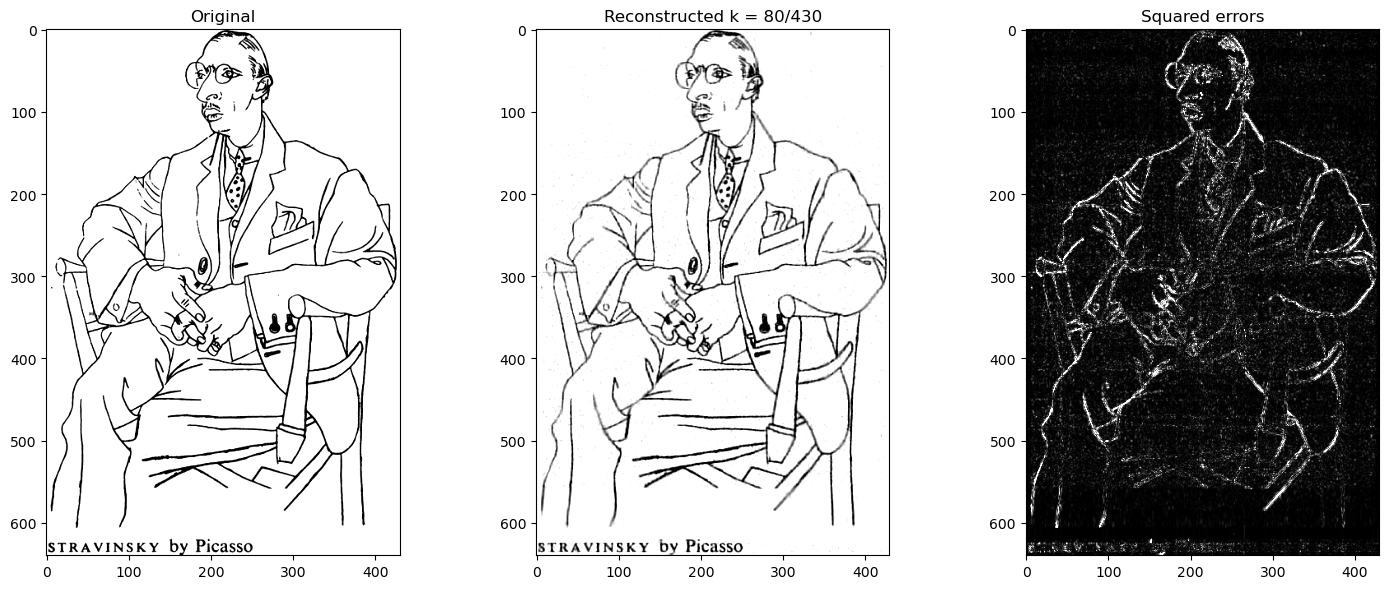

In [32]:
k = 80
strav_rec = U[:,:k] @ S [:k,:k] @ Vt[:k,:]

fig, ax = plt.subplots(1, 3, figsize = (15,6))
ax[0].imshow(strav, cmap = "gray", vmin = 0.1, vmax = 0.9)
ax[0].set_title("Original")
ax[1].imshow(strav_rec, cmap = "gray", vmin = 0.1, vmax = 0.9)
ax[1].set_title(f"Reconstructed k = {k}/{len(s)}")
ax[2].imshow((strav - strav_rec)**2, cmap = "gray", vmin = 0, vmax = 1e-1)
ax[2].set_title("Squared errors")
plt.tight_layout()
plt.savefig('Figure_15_10.png',dpi=300)
plt.show()

In [33]:
print(f"The first 80 singular values account for {100 * (np.cumsum(s) / np.sum(s))[80]:.2f}% of variation")

The first 80 singular values account for 67.74% of variation


In [34]:
mega = 1024**2
strav_size = strav.nbytes / mega
strav_rec_size = strav_rec.nbytes / mega

u_size = U[:,k].nbytes / mega
s_size = s[:k].nbytes / mega
v_size = Vt[:k,:].nbytes / mega

print(f"Original size: {strav_size:.2f} mb")
print(f"Reconstruction size: {strav_rec_size:.2f} mb")
print(f"Reconstruction vectors size: {u_size + s_size + v_size:.2f} mb using {k} components")
print(f"Compression percentage: {100 * (u_size + s_size + v_size) / strav_size:.2f}% of original size")

Original size: 2.10 mb
Reconstruction size: 2.10 mb
Reconstruction vectors size: 0.27 mb using 80 components
Compression percentage: 12.76% of original size


# Exercise 12

# Exercise 13

# Exercise 14